In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [3]:
#download the model to local so it can be used again and again
# Download the module, and uncompress it to the destination folder. 
!curl -L "https://tfhub.dev/google/universal-sentence-encoder-large/3?tf-hub-format=compressed" | tar -zxvC /content/sample_data/google-use

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
./
./tfhub_module.pb
./variables/
./variables/variables.data-00000-of-00001
 97  745M   97  726M    0     0  59.3M      0  0:00:12  0:00:12 --:--:-- 57.8M./variables/variables.index
./assets/
./saved_model.pb
100  745M  100  745M    0     0  59.2M      0  0:00:12  0:00:12 --:--:-- 57.4M


In [6]:
#Function so that one session can be called multiple times. 
#Useful while multiple calls need to be done for embedding. 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow_hub as hub
def embed_useT(module):
    with tf.Graph().as_default():
        sentences = tf.placeholder(tf.string)
        embed = hub.Module(module)
        embeddings = embed(sentences)
        session = tf.train.MonitoredSession()
    return lambda x: session.run(embeddings, {sentences: x})
# use location where files have been downloaded 
embed_fn = embed_useT('/content/sample_data/google-use')

Instructions for updating:
non-resource variables are not supported in the long term
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
from math import*
from decimal import Decimal
""" return cosine similarity between two lists """
def cosine_similarity(x,y):
 
  def square_rooted(x):
    """ return 3 rounded square rooted value """
    return round(sqrt(sum([a*a for a in x])),3)

  numerator = sum(a*b for a,b in zip(x,y))
  denominator = square_rooted(x)*square_rooted(y)
  return round(numerator/float(denominator),3)

In [62]:
!pip install unidecode
!python -m nltk.downloader all

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipp

In [72]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import numpy as np
from scipy import spatial

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string


#remove stop words and punctuations
def pre_process(corpus):
  # convert input corpus to lower case.
  corpus = corpus.lower()
  # collecting a list of stop words from nltk and punctuation form
  # string class and create single array.
  stopset = stopwords.words('english') + list(string.punctuation)
  # remove stop words and punctuations from string.
  # word_tokenize is used to tokenize the input corpus in word tokens.
  corpus = " ".join([i for i in word_tokenize(corpus) if i not in stopset])
  # remove non-ascii characters
  corpus = unidecode(corpus)
  lemmatizer = WordNetLemmatizer()
  words = word_tokenize(corpus)
  processed_words =[]
  for w in words:
    processed_words.append(lemmatizer.lemmatize(w))
  processed_words = ' '.join(processed_words)
  for char in string.punctuation:
    processed_words = processed_words.replace(char, ' ')
  return processed_words
pre_process("16oz Stainless Steel/Polypropylene Mug")

'16oz stainless steel polypropylene mug'

In [80]:
messages = [
    "17 oz Vacuum Insulated Stainless Steel Mug",
    "16oz Stainless Steel/Polypropylene Mug",
    "14 oz Copper-Lined Powder-Coated Insulated Mug",
    "12 oz Vacuum Insulated Ceramic Inside-Coated Coffee Mug",
    "Slo-Release Serenity Squishy™"
]
processed_msgs = []

for i in messages:
  processed_msgs.append(pre_process(i))

print(processed_msgs)

encoding_matrix = embed_fn(processed_msgs)

['17 oz vacuum insulated stainless steel mug', '16oz stainless steel polypropylene mug', '14 oz copper lined powder coated insulated mug', '12 oz vacuum insulated ceramic inside coated coffee mug', 'slo release serenity squishy   tm  ']


array([[0.9999999 , 0.9121602 , 0.9283855 , 0.95685375, 0.30503905],
       [0.9121602 , 0.99999976, 0.9165414 , 0.883798  , 0.34723973],
       [0.9283855 , 0.9165414 , 1.0000001 , 0.89241105, 0.32598466],
       [0.95685375, 0.883798  , 0.89241105, 1.0000001 , 0.31553152],
       [0.30503905, 0.34723973, 0.32598466, 0.31553152, 0.99999976]],
      dtype=float32)

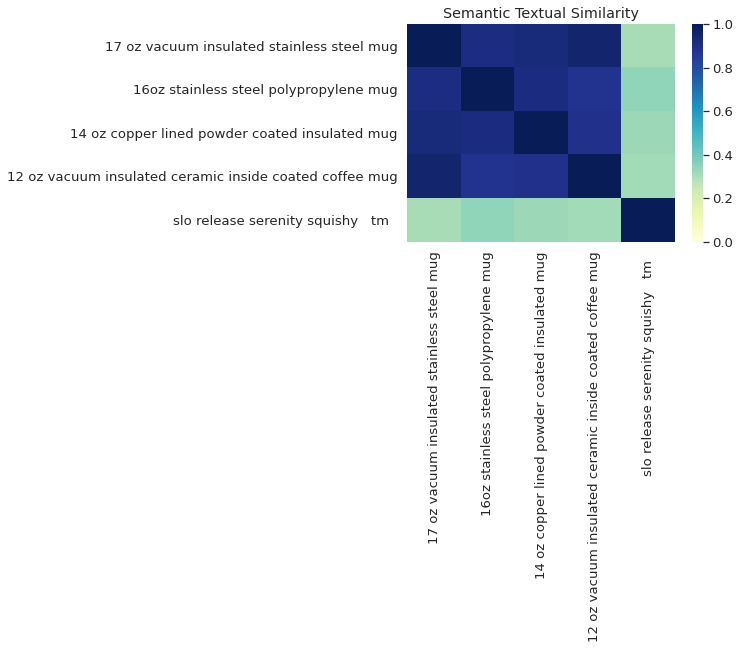

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
    corr,
    xticklabels=labels,
    yticklabels=labels,
    vmin=0,
    vmax=1,
    cmap="YlGnBu")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

plot_similarity(processed_msgs, encoding_matrix, 90)
np.inner(encoding_matrix, encoding_matrix)




3
